# Video Lesson \#15

## Part 1: `pandas` - counting, sorting, and grouping data

In [1]:
# Import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

### Load data from 2013 Puget Sound marine mammal aerial survey

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*8sUL5OndO6FmnJIpsQpPQA.jpeg" width="700">

*Image: Harbor porpoises. Credit: [Bill Keener](https://medium.com/the-ark-newspaper/a-comeback-story-harbor-porpoises-return-to-the-bay-d1ed871e2790) / Golden Gate Cetacean Research.*

**Data source:** https://obis.org/dataset/0e80dc63-b47c-423a-8e34-362f3171ea18

**Background:** "Marine mammal aerial surveys were conducted from 30 August through 4 September 2013 in the Pacific Northwest inland Puget Sound waters. This effort was in support of Marine Mammal Protection Act permit monitoring requirements for the U.S. Navy to conduct marine mammal studies in waters on or adjacent to U.S. Naval installations in the inland Puget Sound Region... . There were 779 marine mammal sightings of over 1716 animals representing 5785 km of flight..."

In [2]:
# Load CSV
# Note that we're parsing the "eventDate" column as datetimes
#   and setting the "recordNumber" column as the index
mm_filepath = 'data/puget_sound_marine_mammal_surveys-1.csv'
mm_data = pd.read_csv(mm_filepath,parse_dates=['eventDate'],index_col='recordNumber')

# View data
display(mm_data)

,individualCount,eventDate,decimalLatitude,decimalLongitude,scientificName,kingdom,phylum,class,order,family,genus,specificEpithet,taxonRank,vernacularName,taxonRemarks
recordNumber,,,,,,,,,,,,,,,
1106_335,1,2013-09-01 10:34:52,47.710125,-122.839587,Elasmobranchii,Animalia,Chordata,Chondrichthyes,NaN,NaN,NaN,NaN,Subclass,cartilaginous fishes,"Taxon recorded as ""Shark"" by the provider"
1106_18,1,2013-08-30 10:39:25,48.142590,-122.625822,Mammalia,Animalia,Chordata,Mammalia,NaN,NaN,NaN,NaN,Class,mammals,"Taxon recorded as ""Unidentified Marine Mammal""..."
1106_84,1,2013-08-30 14:53:26,47.577825,-122.999232,Mammalia,Animalia,Chordata,Mammalia,NaN,NaN,NaN,NaN,Class,mammals,"Taxon recorded as ""Unidentified Small Marine M..."
1106_435,3,2013-09-01 16:36:17,47.611800,-122.467788,Mammalia,Animalia,Chordata,Mammalia,NaN,NaN,NaN,NaN,Class,mammals,"Taxon recorded as ""Unidentified Marine Mammal""..."
1106_706,2,2013-09-03 16:02:45,47.309638,-122.694075,Mammalia,Animalia,Chordata,Mammalia,NaN,NaN,NaN,NaN,Class,mammals,"Taxon recorded as ""Unidentified Small Marine M..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106_515,2,2013-09-02 13:07:44,48.145858,-122.415262,Phocoenidae,Animalia,Chordata,Mammalia,Cetacea,Phocoenidae,NaN,NaN,Family,porpoises,"Taxon recorded as ""Unidentified Porpoise"" by t..."
1106_394,1,2013-09-01 14:29:11,47.245972,-122.601694,Phocoenidae,Animalia,Chordata,Mammalia,Cetacea,Phocoenidae,NaN,NaN,Family,porpoises,"Taxon recorded as ""Unidentified Porpoise"" by t..."
1106_20,2,2013-08-30 10:41:00,48.143300,-122.693150,Phocoenidae,Animalia,Chordata,Mammalia,Cetacea,Phocoenidae,NaN,NaN,Family,porpoises,"Taxon recorded as ""Unidentified Porpoise"" by t..."


### Count unique rows of a Pandas Series using `.value_counts()`

Think of this like creating a histogram.

API reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html

In [3]:
# Count number of rows for each animal
#
# This shows that the most common animal logged is the harbor seal
display(mm_data['vernacularName'].value_counts())

vernacularName
Harbor Seal             675
Harbor Porpoise          66
California Sealion       15
mammals                  12
porpoises                 5
pinnipeds                 4
Risso's Dolphin           2
cartilaginous fishes      1
Name: count, dtype: int64

In [4]:
# Count number of rows for each entry recording a certain number of animals
#
# This shows that most entries record just a single animal, but one entry recorded 150 animals!
display(mm_data['individualCount'].value_counts())

individualCount
1      643
2       71
3       19
5       10
4        5
10       5
25       5
8        4
6        3
12       3
7        2
50       1
40       1
20       1
100      1
65       1
27       1
15       1
55       1
9        1
150      1
Name: count, dtype: int64

### Sort a `Pandas` DataFrame by column label using `.sort_values()`

The main argument is the column label. You can choose to modify the object "in-place" by setting `inplace=True`.

API reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [5]:
# Sort by date
mm_data = mm_data.sort_values('eventDate')     # Option 1: create new copy, reassign to variable
mm_data.sort_values('eventDate', inplace=True)  # Option 2: modify in-place

# Display sorted date column of DataFrame
# Note the index ("recordNumber") now appears to be sorted, too
display(mm_data['eventDate'])

recordNumber
1106_1     2013-08-30 09:16:32
1106_2     2013-08-30 09:16:32
1106_3     2013-08-30 09:16:32
1106_4     2013-08-30 09:42:16
1106_5     2013-08-30 09:42:25
                   ...        
1106_794   2013-09-04 10:01:03
1106_795   2013-09-04 10:02:01
1106_796   2013-09-04 10:02:21
1106_797   2013-09-04 10:02:35
1106_798   2013-09-04 10:02:37
Name: eventDate, Length: 780, dtype: datetime64[ns]

### Overview of `.groupby()`: the "split-apply-combine" method



By "group by", we are referring to a process involving the following steps:

1. **Splitting** the data into groups based on some column or criteria

2. **Applying** a function to each group independently, often one that aggregates each group (i.e. a summary statistic like `.mean()`)

3. **Combining** the results into a new DataFrame

We use the following syntax:

> `df.groupby(<label or labels>).<function>()`

API reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

### Splitting the DataFrame using `.groupby()`

We specify a single column name as an argument. This returns a `GroupBy` object, which is not useful to us until we call a function on it.

In [6]:
# Let's group the data using the column label "vernacularName" (the type of animal)
mm_data.groupby('vernacularName')

### Learning more about a GroupBy object

Attributes and functions shown in this section:
* `.groups`
* `.count()`
* `.get_group()`
* `.first()` and `.last()`

In [7]:
# .groups returns a dictionary with each group label and the index values within that group
mm_data.groupby('vernacularName').groups

{'California Sealion': ['1106_1', '1106_2', '1106_163', '1106_182', '1106_242', '1106_245', '1106_265', '1106_486', '1106_527', '1106_566', '1106_592', '1106_728', '1106_729', '1106_747', '1106_758'], 'Harbor Porpoise': ['1106_21', '1106_27', '1106_28', '1106_29', '1106_30', '1106_36', '1106_43', '1106_65', '1106_83', '1106_117', '1106_121', '1106_123', '1106_136', '1106_138', '1106_208', '1106_266', '1106_268', '1106_269', '1106_270', '1106_277', '1106_282', '1106_285', '1106_286', '1106_287', '1106_298', '1106_315', '1106_324', '1106_325', '1106_327', '1106_337', '1106_383', '1106_418', '1106_436', '1106_446', '1106_450', '1106_453', '1106_454', '1106_455', '1106_464', '1106_465', '1106_466', '1106_467', '1106_468', '1106_469', '1106_477', '1106_478', '1106_509', '1106_510', '1106_511', '1106_538', '1106_690', '1106_735', '1106_742', '1106_744', '1106_746', '1106_750', '1106_751', '1106_752', '1106_753', '1106_754', '1106_755', '1106_756', '1106_757', '1106_762', '1106_763', '1106_79

In [8]:
# Recall that a dictionary is an object with key-value pairs
# and we can get the keys using .keys()
#
# Then we can convert to a list using list()
list(mm_data.groupby('vernacularName').groups.keys())

['California Sealion',
 'Harbor Porpoise',
 'Harbor Seal',
 "Risso's Dolphin",
 'cartilaginous fishes',
 'mammals',
 'pinnipeds',
 'porpoises']

In [9]:
# .count() is similar to .value_counts() — it counts the number of rows with data in each group, for each column
#
# Here, notice that some columns are missing data for some groups.
# For instance, there's no order/family/genus specified for the generic label "mammals", probably because
# the scientists used that label for instances where they couldn't determine what type of mammal they had seen.
mm_data.groupby('vernacularName').count()

,individualCount,eventDate,decimalLatitude,decimalLongitude,scientificName,kingdom,phylum,class,order,family,genus,specificEpithet,taxonRank,taxonRemarks
vernacularName,,,,,,,,,,,,,,
California Sealion,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Harbor Porpoise,66,66,66,66,66,66,66,66,66,66,66,66,66,66
Harbor Seal,675,675,675,675,675,675,675,675,675,675,675,675,675,675
Risso's Dolphin,2,2,2,2,2,2,2,2,2,2,2,2,2,2
cartilaginous fishes,1,1,1,1,1,1,1,1,0,0,0,0,1,1
mammals,12,12,12,12,12,12,12,12,0,0,0,0,12,12
pinnipeds,4,4,4,4,4,4,4,4,4,0,0,0,4,4
porpoises,5,5,5,5,5,5,5,5,5,5,0,0,5,5


In [10]:
# Use .get_group() to get a subset of the original DataFrame
mm_data.groupby('vernacularName').get_group('Risso\'s Dolphin')

,individualCount,eventDate,decimalLatitude,decimalLongitude,scientificName,kingdom,phylum,class,order,family,genus,specificEpithet,taxonRank,vernacularName,taxonRemarks
recordNumber,,,,,,,,,,,,,,,
1106_239,2,2013-08-31 11:19:34,47.543402,-122.444832,Grampus griseus,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Grampus,griseus,Species,Risso's Dolphin,"Taxon recorded as ""Risso's Dolphin"" by the pro..."
1106_767,2,2013-09-04 08:56:50,47.732910,-122.421702,Grampus griseus,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Grampus,griseus,Species,Risso's Dolphin,"Taxon recorded as ""Risso's Dolphin"" by the pro..."


In [11]:
# Column indexing using brackets ([]) works normally on grouped data
mm_data.groupby('vernacularName').get_group('Risso\'s Dolphin')['eventDate']

recordNumber
1106_239   2013-08-31 11:19:34
1106_767   2013-09-04 08:56:50
Name: eventDate, dtype: datetime64[ns]

In [12]:
# Use .first() or .last() to get the first or last rows in each group
# 
# From this, we learn that the first sighting of harbor seals was on August 30, and that
# the researchers saw 25 harbor seals in that sighting.
mm_data.groupby('vernacularName').first()

,individualCount,eventDate,decimalLatitude,decimalLongitude,scientificName,kingdom,phylum,class,order,family,genus,specificEpithet,taxonRank,taxonRemarks
vernacularName,,,,,,,,,,,,,,
California Sealion,1,2013-08-30 09:16:32,47.781028,-122.466250,Zalophus californianus,Animalia,Chordata,Mammalia,Carnivora,Otariidae,Zalophus,californianus,Species,"Taxon recorded as ""California Sea Lion"" by the..."
Harbor Porpoise,1,2013-08-30 10:41:23,48.149585,-122.703068,Phocoena phocoena,Animalia,Chordata,Mammalia,Cetacea,Phocoenidae,Phocoena,phocoena,Species,"Taxon recorded as ""Harbor Porpoise"" by the pro..."
Harbor Seal,25,2013-08-30 09:42:16,48.377565,-122.560668,Phoca vitulina,Animalia,Chordata,Mammalia,Carnivora,Phocidae,Phoca,vitulina,Species,"Taxon recorded as ""Harbor Seal"" by the provider"
Risso's Dolphin,2,2013-08-31 11:19:34,47.543402,-122.444832,Grampus griseus,Animalia,Chordata,Mammalia,Cetacea,Delphinidae,Grampus,griseus,Species,"Taxon recorded as ""Risso's Dolphin"" by the pro..."
cartilaginous fishes,1,2013-09-01 10:34:52,47.710125,-122.839587,Elasmobranchii,Animalia,Chordata,Chondrichthyes,None,None,None,None,Subclass,"Taxon recorded as ""Shark"" by the provider"
mammals,1,2013-08-30 10:39:25,48.142590,-122.625822,Mammalia,Animalia,Chordata,Mammalia,None,None,None,None,Class,"Taxon recorded as ""Unidentified Marine Mammal""..."
pinnipeds,5,2013-08-30 09:16:32,47.781018,-122.466263,Caniformia,Animalia,Chordata,Mammalia,Carnivora,None,None,None,Suborder,"Taxon recorded as ""Unidentified Pinniped"" by t..."
porpoises,2,2013-08-30 10:41:00,48.143300,-122.693150,Phocoenidae,Animalia,Chordata,Mammalia,Cetacea,Phocoenidae,None,None,Family,"Taxon recorded as ""Unidentified Porpoise"" by t..."


### Applying functions to aggregate data within groups

In the "split-apply-combine" paradigm, this is the **apply** and **combine** part.

You can apply NumPy functions like `.mean()`, `.sum()`, `.median()`, `.max()`, `.min()`, and `.std()` to calculate statistics for each numerical column of a grouped DataFrame (a `GroupBy` object).

You can also call `.describe()` on a grouped DataFrame to get a number of useful summary statistics.

In [13]:
# Calculate averages over animal groups
#
# From this, we learn that the average location where California sea lions were sighted
# was 47.719°N, 122.585°W.
mm_groups = mm_data.groupby('vernacularName').mean(numeric_only = True)
print(mm_groups)

                      individualCount  decimalLatitude  decimalLongitude
vernacularName                                                          
California Sealion           1.333333        47.719321       -122.585271
Harbor Porpoise              2.242424        47.822614       -122.585301
Harbor Seal                  2.241481        47.575504       -122.654574
Risso's Dolphin              2.000000        47.638156       -122.433267
cartilaginous fishes         1.000000        47.710125       -122.839587
mammals                      1.333333        47.568643       -122.571448
pinnipeds                    2.250000        47.810799       -122.503737
porpoises                    1.400000        47.816668       -122.585215


In [14]:
# Calculate sums over animal groups
#
# From this, we learn that the researchers saw a total of 1513 harbor seals.
# Note that it doesn't really make sense to calculate the sum of latitude or longitude, but Pandas does it anyway.
mm_data.groupby('vernacularName').sum(numeric_only = True)

,individualCount,decimalLatitude,decimalLongitude
vernacularName,,,
California Sealion,20,715.789815,-1838.779060
Harbor Porpoise,148,3156.292495,-8090.629848
Harbor Seal,1513,32113.465014,-82791.837713
Risso's Dolphin,4,95.276312,-244.866534
cartilaginous fishes,1,47.710125,-122.839587
mammals,16,570.823710,-1470.857377
pinnipeds,9,191.243194,-490.014949
porpoises,7,239.083339,-612.926077


In [15]:
# Use .describe() to get common summary statistics by group for numerical columns
mm_data.groupby('vernacularName').describe()

individualCount                                         
                               count      mean  min  25%  50%   75%    max   
vernacularName                                                               
California Sealion              15.0  1.333333  1.0  1.0  1.0  1.00    5.0  \
Harbor Porpoise                 66.0  2.242424  1.0  1.0  2.0  2.75   10.0   
Harbor Seal                    675.0  2.241481  1.0  1.0  1.0  1.00  150.0   
Risso's Dolphin                  2.0  2.000000  2.0  2.0  2.0  2.00    2.0   
cartilaginous fishes             1.0  1.000000  1.0  1.0  1.0  1.00    1.0   
mammals                         12.0  1.333333  1.0  1.0  1.0  1.25    3.0   
pinnipeds                        4.0  2.250000  1.0  1.0  1.5  2.75    5.0   
porpoises                        5.0  1.400000  1.0  1.0  1.0  2.00    2.0   

                               eventDate                                 ...   
                           std     count                           mean  ...   
vernacularName                                                           ...   
California Sealion    1.046536        15     2013-09-01 18:25:09.400000  ...  \
Harbor Porpoise       1.961637        66  2013-09-01 19:41:00.560605952  ...   
Harbor Seal           8.363021       675  2013-09-01 17:15:53.810370304  ...   
Risso's Dolphin       0.000000         2            2013-09-02 10:08:12  ...   
cartilaginous fishes       NaN         1            2013-09-01 10:34:52  ...   
mammals               0.651339        12  2013-09-02 05:51:47.833333504  ...   
pinnipeds             1.892969         4            2013-09-02 08:46:38  ...   
porpoises             0.547723         5     2013-09-01 02:48:32.200000  ...   

                     decimalLatitude           decimalLongitude               
                                 max       std            count        mean   
vernacularName                                                                
California Sealion         48.246992  0.344907             15.0 -122.585271  \
Harbor Porpoise            48.255590  0.312824             66.0 -122.585301   
Harbor Seal                48.398337  0.388671            675.0 -122.654574   
Risso's Dolphin            47.732910  0.134002              2.0 -122.433267   
cartilaginous fishes       47.710125       NaN              1.0 -122.839587   
mammals                    48.142590  0.242302             12.0 -122.571448   
pinnipeds                  48.144022  0.229888              4.0 -122.503737   
porpoises                  48.145858  0.377054              5.0 -122.585215   

                                                                       
                             min         25%         50%         75%   
vernacularName                                                         
California Sealion   -123.116735 -122.656281 -122.535053 -122.466250  \
Harbor Porpoise      -122.943988 -122.691010 -122.591978 -122.457967   
Harbor Seal          -123.154293 -122.752710 -122.660135 -122.508615   
Risso's Dolphin      -122.444832 -122.439050 -122.433267 -122.427484   
cartilaginous fishes -122.839587 -122.839587 -122.839587 -122.839587   
mammals              -122.999232 -122.642885 -122.496776 -122.461870   
pinnipeds            -122.653628 -122.513104 -122.465508 -122.456141   
porpoises            -122.779111 -122.693150 -122.601694 -122.436860   

                                            
                             max       std  
vernacularName                              
California Sealion   -122.386922  0.184863  
Harbor Porpoise      -122.225460  0.137630  
Harbor Seal          -122.326510  0.178132  
Risso's Dolphin      -122.421702  0.016355  
cartilaginous fishes -122.839587       NaN  
mammals              -122.362625  0.185116  
pinnipeds            -122.430305  0.101298  
porpoises            -122.415262  0.158438  

[8 rows x 32 columns]

### Using `.groupby()` to group multiple columns

Note that specifying multiple columns creates a hierarchical index (an index with more than one level), also called a `MultiIndex`.

In [16]:
mm_data.groupby(['vernacularName','individualCount']).mean(numeric_only = True)

decimalLatitude  decimalLongitude
vernacularName       individualCount                                   
California Sealion   1                      47.679607       -122.571770
                     2                      48.110662       -122.768338
                     5                      47.844262       -122.577713
Harbor Porpoise      1                      47.880072       -122.583822
                     2                      47.809361       -122.528377
                     3                      47.609653       -122.683467
                     4                      47.302428       -122.457316
                     5                      47.809651       -122.612849
                     6                      48.175698       -122.720933
                     8                      48.099483       -122.669892
                     10                     48.127776       -122.704419
Harbor Seal          1                      47.556712       -122.653050
                     2                      47.637835       -122.668783
                     3                      47.672507       -122.678422
                     4                      47.720086       -122.630414
                     5                      47.578283       -122.754133
                     6                      47.820535       -122.593805
                     7                      47.290786       -122.715540
                     8                      48.028787       -122.730871
                     9                      48.283997       -122.605268
                     10                     47.629669       -122.611826
                     12                     47.567780       -122.792280
                     15                     47.578723       -122.539018
                     20                     47.947500       -122.677932
                     25                     48.097572       -122.634589
                     27                     47.947425       -122.673927
                     40                     47.595033       -122.473410
                     50                     48.214355       -122.403397
                     55                     48.376978       -122.562302
                     65                     48.209340       -122.402685
                     100                    47.113098       -122.720423
                     150                    47.210345       -122.660135
Risso's Dolphin      2                      47.638156       -122.433267
cartilaginous fishes 1                      47.710125       -122.839587
mammals              1                      47.613947       -122.592543
                     2                      47.343193       -122.528350
                     3                      47.611800       -122.467788
pinnipeds            1                      47.659077       -122.447529
                     2                      48.144022       -122.653628
                     5                      47.781018       -122.466263
porpoises            1                      47.598060       -122.605888
                     2                      48.144579       -122.554206

### Putting it all together using a Cartopy map

/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])
/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


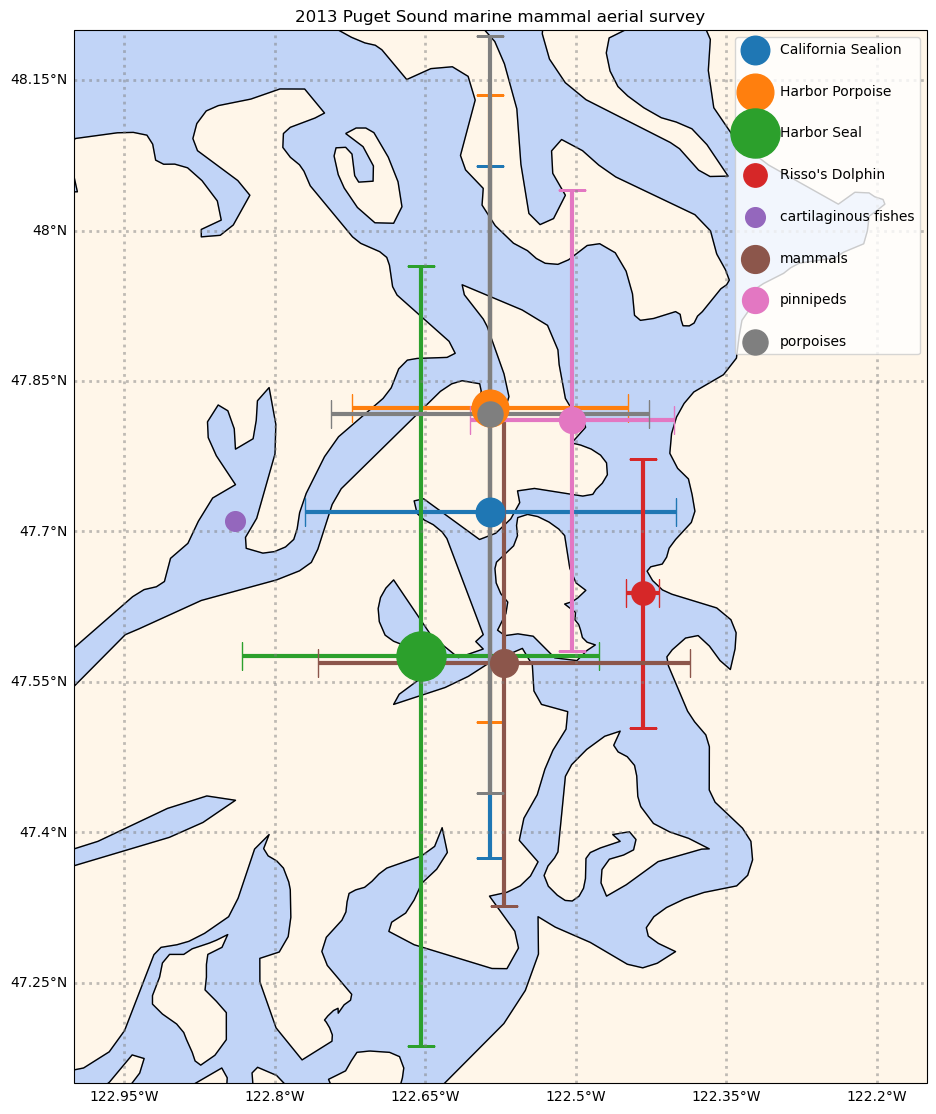

In [17]:
# Set up Cartopy map
fig = plt.figure(figsize=(11, 14))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.LAND,color='papayawhip',alpha=0.5)
ax.add_feature(cfeature.OCEAN,color='cornflowerblue',alpha=0.4)
ax.set_extent([-123.0, -122.15, 47.15, 48.2]) # [x0, x1, y0, y1]
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                  linewidth=2, color='gray', alpha=0.5, linestyle=':')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.set_title('2013 Puget Sound marine mammal aerial survey')

# Group data by animal name
mm_data_grouped = mm_data.groupby('vernacularName')

# Use loop to iterate over each animal
for animal in list(mm_data_grouped.groups.keys()):
    animal_total_count = mm_data_grouped.sum(numeric_only = True)['individualCount'].loc[animal]
    animal_avg_lon = mm_data_grouped.mean(numeric_only = True)['decimalLongitude'].loc[animal]
    animal_avg_lat = mm_data_grouped.mean(numeric_only = True)['decimalLatitude'].loc[animal]
    animal_std_lon = mm_data_grouped.std(numeric_only = True)['decimalLongitude'].loc[animal]
    animal_std_lat = mm_data_grouped.std(numeric_only = True)['decimalLatitude'].loc[animal]

    # Add scatter points, with size corresponding to number of sightings (scaled by the 1/4 power)
    #     and location corresponding to average location
    #     and errorbars corresponding to standard deviation of location
    ax.scatter(animal_avg_lon, animal_avg_lat,
               s=200 * animal_total_count**0.25,
               label=animal, 
               zorder=3,
               transform=ccrs.PlateCarree())
    ax.errorbar(animal_avg_lon, animal_avg_lat,
                xerr=animal_std_lon,
                yerr=animal_std_lat,
                elinewidth=3, 
                capsize=10)

# Create legend
plt.legend(labelspacing=2);